# Project: Bank Outages vs Sentiment Analysis 

## Hypothesis 
  Bank customer sentiment is impacted by the number of bank outages experienced, this also affects customer satisfaction (and consequently revenue) 

### Operations
#### Twitter data
Twint to scrape tweets of the top 3 banks in South Africa \
Clean tweets with WordPunctTokenizer and Regex \
TextBlog to process sentiment of tweets 
#### Outage data
https://downdetector.co.za/

#### Customer Satisfaction 
Customer satisfaction index by _____


# Quick Twint code
Github - https://github.com/twintproject/twint

All functions - https://github.com/twintproject/twint/wiki/Configuration
### initialise setup 
c.twint.Config() 
#### set username
c.Username = "realDonaldTrump"
#### set phrase search
c.Search = "great"
#### limitations
c.Limit = 1            ---- limit to batches (unknown size)

c.Since = "2019–04–29"

c.Until = "2020–04–29"
#### Pandas 
c.Pandas = True        -----once run save to dataframe

    ---- Tweets 
    df = twint.storage.panda.Tweets_df
    
    ---- followers 
    df = twint.storage.panda.Follow_df

#### Write output 
c.Store_csv = True

c.Output = "test.csv"

c.Store_json = True

### Execute determines how its run- using setup above
twint.run.Search(c)    --- will run search for all tweets with the above

twint.run.Profile(c)   ---- will run against profile - return only this profiles tweets

twint.run.Followers(c) ---- get follower info 

In [1]:
import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()            #for compatibility issues with twint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import seaborn as sns

#cleaning
import re
from nltk.tokenize import WordPunctTokenizer

# NLP
from textblob import TextBlob

#word cloud and stopwords
from wordcloud import WordCloud, STOPWORDS

### Configure and run Twint (twitter scrapper)

In [2]:
def twintConfig(date_from,search_string):    
    c = twint.Config()
    c.Search = search_string
    c.Pandas = True
    
    #english only
    c.Lang = "en"
    c.Since = date_from
    
    #c.Until = "2021-07-30"
    twint.run.Search(c)
    
#stdBankString = "StandardBankZA OR \"Standard Bank\""
#FNB_String = "FNBSA"

### Run twint

In [3]:
bank_search = {"FNB":"FNBSA", "StandardBank":"StandardBankZA OR \"Standard Bank\""}
since = "2021-09-01"

def Run_Twint(search_vals):
    
    #set empty dataframe
    Final_df= pd.DataFrame()
    
    for bank in search_vals.items():
        print ("running: "+bank[0]+"\n")
        
        #run twint
        twintConfig(since,bank[1])
        
        #get dataframe
        tweets_df = twint.storage.panda.Tweets_df
        
        #join Dataframes and create Bank name column
        tweets_df["Bank"]= bank[0]
        Final_df = pd.concat([Final_df,tweets_df])
    return Final_df

In [273]:
tweets_df = Run_Twint(bank_search)


1432976959768825859 2021-09-01 10:01:45 +0200 <GivenchyTumelo> @FNBSA #LoveFNB
1432976892815106049 2021-09-01 10:01:29 +0200 <BlueSpicey> @FNBSA It's hassle free no queueing needed , no bank charges which is awesome easy and very convenient 😀 #LoveFNB
1432976744491913219 2021-09-01 10:00:53 +0200 <Leonie01221338> @FNBSA #LoveFNB  Its convenient-swipe to pay and withdraw at same time
1432976375569342464 2021-09-01 09:59:26 +0200 <Yingwani8> @FNBSA Definitely it helps me i save on withdrawal fees because Cash@till is free. #LoveFNB
1432976288298508288 2021-09-01 09:59:05 +0200 <Chizboy_SA> @FNBSA With cash at till service you can pay for your goods and withdraw cash - all at once at your favourite Shopping outlets #LoveFNB
1432976277049331713 2021-09-01 09:59:02 +0200 <WOmuhk> @FNBSA Cash@till is easy,safe and also No bank charges  #LoveFNB
1432976248800780290 2021-09-01 09:58:55 +0200 <ChivellLeonora> @FNBSA No more rushing to an ATM #LoveFNB
1432976085793349633 2021-09-01 09:58:16 +0

1432971474910986240 2021-09-01 09:39:57 +0200 <Gogo86635029> @FNBSA @SuperSportTV #LoveFNB
1432971408284475394 2021-09-01 09:39:41 +0200 <lizzy_930> @FNBSA Cash@till is 100% convenient ,  free withdrawals that way I save every time I get cash at till, it also saves time and safe, withdrawing while doing my groceries saves me a lot of time   #LoveFNB
1432971407215022085 2021-09-01 09:39:41 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971377431261192 2021-09-01 09:39:34 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971324473978880 2021-09-01 09:39:21 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971288516120580 2021-09-01 09:39:13 +0200 <phat_siiFashion> @FNBSA #LoveFNB Cash@Till makes saving easy for for me and earning eBucks
1432971267162923009 2021-09-01 09:39:08 +0200 <Gogo86635029> @FNBSA #LoveFNB
1432971261496397830 2021-09-01 09:39:06 +0200 <mdk4real> @FNBSA #LoveFNB u call it cash@till, i “call it cash 911”since my nearest ATM was bombarded meanwhile i was in my way to get cash b4 going to wor

## Pandas -  EDA 

In [4]:
#Export to csv
#tweets_df.to_csv("pre_cleaning_en.csv")
tweets_df = pd.read_csv("pre_cleaning_en.csv")

In [5]:
len(tweets_df)

2649

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2649 non-null   int64  
 1   id               2649 non-null   int64  
 2   conversation_id  2649 non-null   int64  
 3   created_at       2649 non-null   float64
 4   date             2649 non-null   object 
 5   timezone         2649 non-null   int64  
 6   place            1 non-null      object 
 7   tweet            2649 non-null   object 
 8   language         2649 non-null   object 
 9   hashtags         2649 non-null   object 
 10  cashtags         2649 non-null   object 
 11  user_id          2649 non-null   int64  
 12  user_id_str      2649 non-null   int64  
 13  username         2649 non-null   object 
 14  name             2649 non-null   object 
 15  day              2649 non-null   int64  
 16  hour             2649 non-null   int64  
 17  link          

In [7]:
# remove unnecessary rows 
base_tweets = tweets_df[["date", "username", "tweet","language", "hashtags","retweet_id","reply_to" ,"nlikes","search","Bank"]]

### should 'likes' impact sentiment????

 \
.\
.

Come back to this 

In [8]:
base_tweets[base_tweets["nlikes"]>0].sort_values(by = "nlikes").head()

,date,username,tweet,language,hashtags,retweet_id,reply_to,nlikes,search,Bank
13,2021-09-03 08:59:06,Lazzy70892008,@FNBSA Easy Payments and my business has becom...,en,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",1,FNBSA,FNB
1675,2021-09-01 09:08:12,Phat_Sii,@FNBSA #LoveFNB Cash@Till has helped me to sav...,en,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",1,FNBSA,FNB
1649,2021-09-01 09:14:45,Mbalee__Omuhle,@FNBSA I get to save when I withdraw on a till...,en,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",1,FNBSA,FNB
2430,2021-09-01 10:55:23,wendyknowler,@ratshicomes @StandardBankZA Crap timing!,en,[],NaN,"[{'screen_name': 'ratshicomes', 'name': 'Roton...",1,"StandardBankZA OR ""Standard Bank""",StandardBank
1596,2021-09-01 09:28:06,Makopo1,@FNBSA I have my groceries and extra cash or o...,en,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",1,FNBSA,FNB


### Language analysis 

Although the language tag doesnt seem to get it right 100% of the time, we will drop these rows everything not:
* und = undefined, this will include just hashtags --- will keep this to include hashtags 
*en = english 

In [9]:
base_tweets["language"].unique()

array(['en', 'und', 'sv', 'is', 'ht', 'fr', 'tl', 'nl', 'in', 'pl', 'sl',
       'ro', 'da', 'cy', 'ja', 'es', 'th', 'it', 'pt'], dtype=object)

In [10]:
# remove all rows where language is not english or undefined
base_tweets = base_tweets[base_tweets["language"].isin([ 'und', 'en'])]

In [11]:
base_tweets["language"].unique()

array(['en', 'und'], dtype=object)

### Remove tweets from Bank owned accounts i.e. FNBSA


Come back to this ---> use the bank_search list 

In [12]:
# remove rows where username is not in bank_search
base_tweets = base_tweets[ ~base_tweets["username"].str.contains('FNB|StandardBank',regex = True)   ]

In [13]:
len(base_tweets)

2558

### Visualisation pre-clean

Text(0.5, 1.0, 'Count of Tweets by bank')

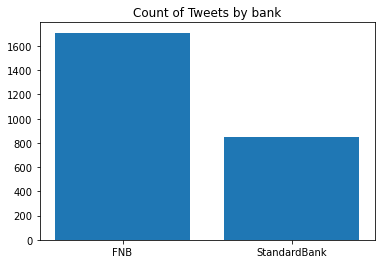

In [14]:
#check duplicates 
#tweets_df["tweet"].duplicated().value_counts()'''

plt.bar(base_tweets["Bank"].value_counts().index, base_tweets["Bank"].value_counts() )
plt.title("Count of Tweets by bank")

### Cleaning tweet data 


In [15]:
def link_at_s_removal(text):  
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4))
    text = re.sub(combined_pat,"",text)
    return text

def clean_text(text): 
    text=link_at_s_removal(text)
    
    text = re.sub('[^A-Za-z\s]', '', text.lower())        #remove non-alphabet
    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in STOPWORDS
    ]
    return ' '.join(clean_text)

#### run tween cleaner

In [16]:
cleaned_list = []

for t in base_tweets["tweet"]:
    cleaned_list.append(clean_text(t))

In [17]:
##make a dataframe for sentiment analysis
clean_df = pd.DataFrame(cleaned_list,columns=['tweet'])
clean_df.head()

,tweet
0,really starting frustrate bankers chat helpful
1,
2,dont wait long queues atm bank charges withdra...
3,
4,


In [18]:
clean_df = clean_df [ ~(clean_df["tweet"] =="")]

## Sentiment analysis 

In [19]:
for index, row in clean_df.iterrows():
    tweet = clean_df.at[index, 'tweet']

    #run sentiment using TextBlob
    analysis = TextBlob(tweet)

    #set value to dataframe
    clean_df.at[index, 'polarity'] = analysis.sentiment[0]
    clean_df.at[index, 'subjectivity'] = analysis.sentiment[1]


    #Create Positive / negative column depending on polariity
    if analysis.sentiment[0]>0:

        clean_df.at[index, 'Sentiment'] = "Positive"
        #printmd('Positive', color="green")

    elif analysis.sentiment[0]<0:

        clean_df.at[index, 'Sentiment'] = "Negative"
    else:

        clean_df.at[index, 'Sentiment'] = "Neutral"

In [20]:
clean_df.to_csv("cleaned.csv")
clean_df.head()

,tweet,polarity,subjectivity,Sentiment
0,really starting frustrate bankers chat helpful,0.000000,0.100000,Neutral
2,dont wait long queues atm bank charges withdra...,-0.050000,0.400000,Negative
5,easy payment save time,0.433333,0.833333,Positive
6,cant see damn money gone damn sms transactions...,0.000000,0.000000,Neutral
7,dont stand long ques atm less risky cheaper ba...,-0.108333,0.233333,Negative


## Merge cleaned and original 

In [80]:
Final_df = clean_df.merge(base_tweets,how="inner", left_index=True, right_index=True)

In [81]:
Final_df = Final_df.rename(columns={"tweet_x": "cleaned_tweet", "tweet_y": "Base_tweet"})
Final_df.head(2)

,cleaned_tweet,polarity,subjectivity,Sentiment,date,username,Base_tweet,language,hashtags,retweet_id,reply_to,nlikes,search,Bank
0,really starting frustrate bankers chat helpful,0.00,0.1,Neutral,2021-09-03 09:08:39,trevzngcobo,@FNBSA is really starting to frustrate me 😫😭 t...,en,[],NaN,[],0,FNBSA,FNB
2,dont wait long queues atm bank charges withdra...,-0.05,0.4,Negative,2021-09-03 09:07:08,Priscil95250943,@FNBSA I don't have to wait in long queues at ...,en,['lovefnb'],NaN,"[{'screen_name': 'FNBSA', 'name': 'FNB South A...",0,FNBSA,FNB


## Visualisation 

#### Check distribution

In [82]:
Final_df["date"] = pd.to_datetime(Final_df["date"])
#set index = date so as to create rolling mean 
Final_df = Final_df.sort_values('date').set_index('date')

In [83]:
##### remove neutral values 
Final_df = Final_df[Final_df.polarity != 0]

In [84]:
#get bank Dataframes
standard_df = Final_df[(Final_df.Bank=="StandardBank")]
FNB_df = Final_df[(Final_df.Bank=="FNB")]

Get rolling/ expanding mean 

In [85]:
import warnings
warnings.filterwarnings('ignore')



standard_df['mean'] = standard_df['polarity'].expanding().mean()
standard_df['rolling'] = standard_df['polarity'].rolling("1d").mean()
FNB_df['mean'] = FNB_df['polarity'].expanding().mean()
FNB_df['rolling'] = FNB_df['polarity'].rolling("1d").mean()



In [86]:
standard_df[["polarity","mean","rolling"]].head(10)

,polarity,mean,rolling
date,,,
2021-09-01 09:08:23,-0.050000,-0.050000,-0.050000
2021-09-01 09:09:10,0.433333,0.191667,0.191667
2021-09-01 09:09:50,0.433333,0.272222,0.272222
2021-09-01 09:22:50,-0.400000,0.104167,0.104167
2021-09-01 09:42:30,-0.250000,0.033333,0.033333
2021-09-01 09:42:37,0.093750,0.043403,0.043403
2021-09-01 09:46:53,-0.050000,0.030060,0.030060
2021-09-01 09:47:00,-0.200000,0.001302,0.001302
2021-09-01 09:47:14,-0.400000,-0.043287,-0.043287


In [87]:
Final_df[["cleaned_tweet","Bank"]].groupby(["Bank"]).count()

,cleaned_tweet
Bank,
FNB,672
StandardBank,329


,cleaned_tweet
Sentiment,
Negative,322
Positive,679


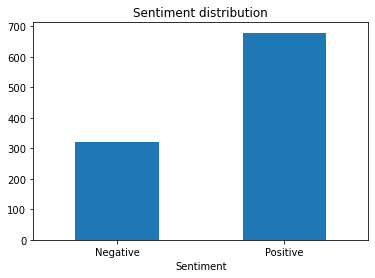

In [89]:
# Plotting the distribution for dataset.
ax = Final_df.groupby('Sentiment').count()["Bank"].plot(kind='bar', title='Sentiment distribution',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
Final_df[["cleaned_tweet","Sentiment"]].groupby(["Sentiment"]).count()

Text(0.5, 1.0, 'FNB')

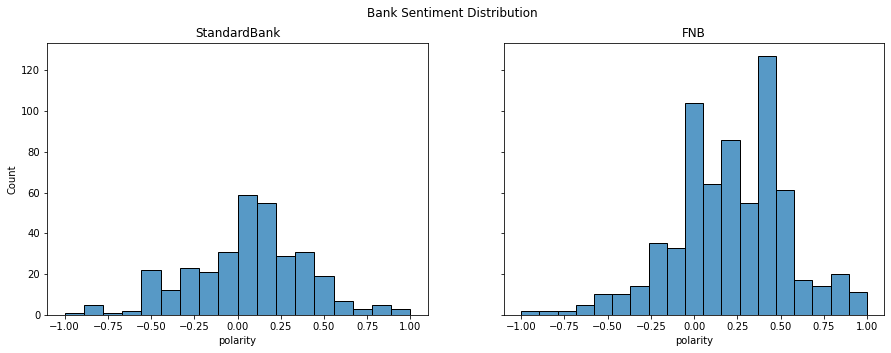

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Bank Sentiment Distribution')

#StandardBank
sns.histplot(ax=axes[0], data= standard_df['polarity'])
axes[0].set_title("StandardBank")

# FNB
sns.histplot(ax=axes[1], data = FNB_df['polarity'])
axes[1].set_title("FNB")

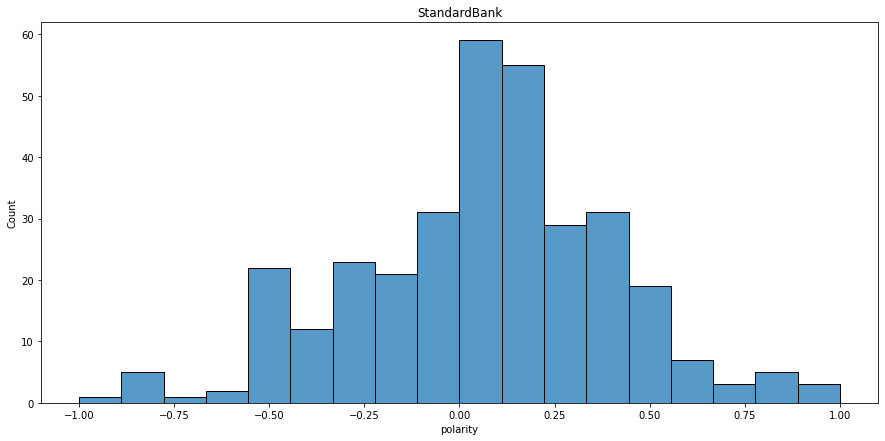

In [91]:
#plot Standard Bank 
fig2 = plt.figure(figsize=(15,7))
plt.title("StandardBank")
sns.histplot(standard_df['polarity'])
#plt.subplot(sns.histplot(standard_df['polarity']))
plt.show()

# Word Cloud

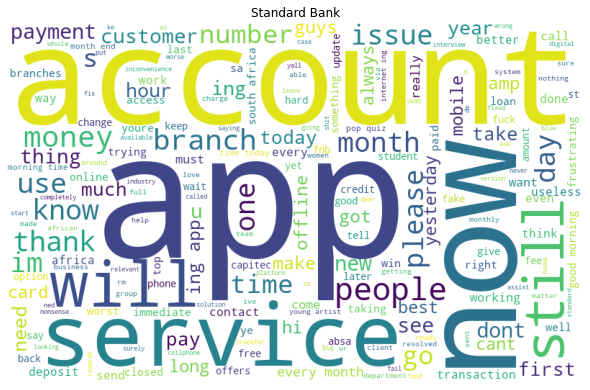

In [32]:
tweetString = " ".join(list(standard_df["cleaned_tweet"])).lower()
tweetString1 = re.sub(r"standardbankza|standard bank|bank","",tweetString)     #remove bank name

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Standard Bank")
plt.tight_layout(pad = 0) 
plt.show()

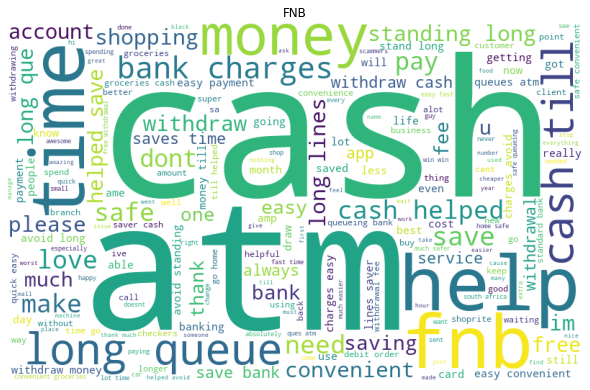

In [33]:
Fnb_string = " ".join(list(FNB_df["cleaned_tweet"])).lower()

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(Fnb_string)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("FNB")
plt.tight_layout(pad = 0) 
plt.show()

# Mean plots

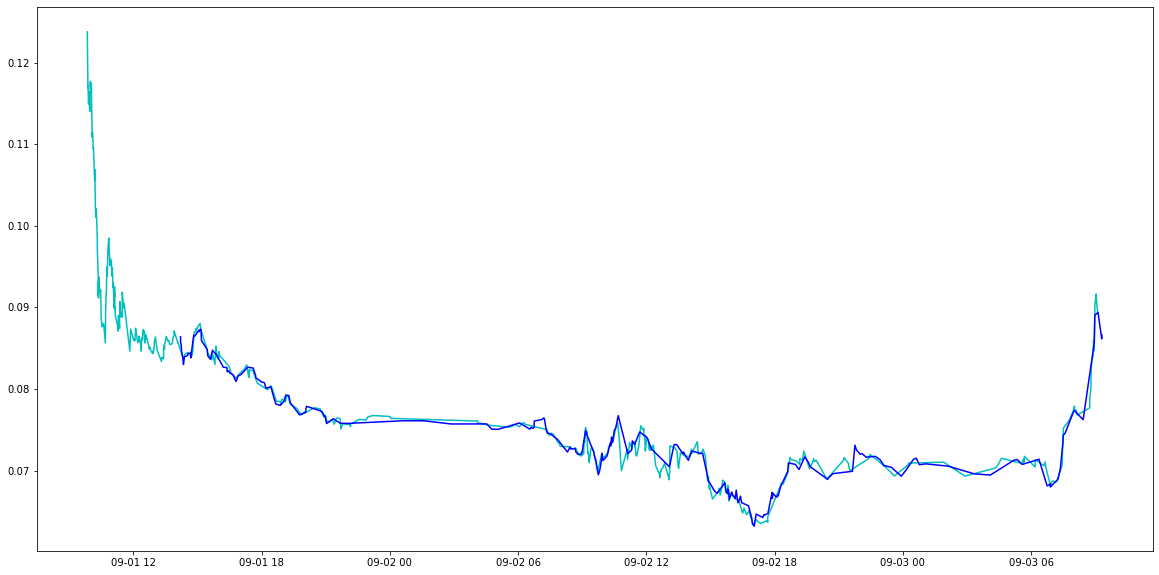

In [53]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.plot(FNB_df.iloc[100:].index,FNB_df.iloc[100:]['rolling'], color ='c', label='Rolling Mean')
#ax.plot(Final_df.index,Final_df['mean'], color='y', label='Expanding Mean')
ax.plot(standard_df.iloc[100:].index,standard_df.iloc[100:]['rolling'], color ='b', label='Rolling Mean')


plt.show()

In [42]:
standard_df["Bank"].unique()

array(['StandardBank'], dtype=object)